# Santander Customer Satisfaction - Which customers are happy customers?

## Information about this notebook
### Source
This notebook aims to explore, gain insights, and solve the problems related to the data in the following source:
- https://www.kaggle.com/c/santander-customer-satisfaction/overview

### Data
This notebook depends on the following data files:
- train.csv
- test.csv

### References
The content of this notebook is based on knowledge gained from the following resources:
- https://www.kaggle.com/cast42/exploring-features

## Introduction
### Description
From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.

In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.

### Evaluation
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

### Data
You are provided with an anonymized dataset containing a large number of numeric variables. The "TARGET" column is the variable to predict. It equals 1 for unsatisfied customers and 0 for satisfied customers.

The task is to predict the probability that each customer in the test set is an unsatisfied customer.

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="white", color_codes=True)

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

#X_train = pd.read_csv("train.csv")
#X_test = pd.read_csv("test.csv")

## Exploratory data analysis

In [2]:
# Describe data
print('Data set dimenionality: {}'.format(df_train.shape))
print('Data set has missing values: {}'.format(df_train.isnull().values.any()))
print('Snippet of data:')
df_train.head()

Data set dimenionality: (76020, 371)
Data set has missing values: False
Snippet of data:


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


We have the following distribution of happy and unhappy customers:

In [3]:
n_happy = len(df_train.loc[df_train.TARGET == 0])
n_unhappy = len(df_train.loc[df_train.TARGET == 1])
s = n_happy + n_unhappy
print('{:.2f}% are happy'.format(100*n_happy/s))
print('{:.2f}% are unhappy'.format(100*n_unhappy/s))

96.04% are happy
3.96% are unhappy


### Features
The problem description does not say anything about the features in the data. So we'll try to uncover what some of these features represents in this section.

#### Useless features
We noted above that the data doesn't contain any NaNs. However, we observe that a lot of the features only have 0 as their entry:

In [4]:
print('(Value - feature)')
for col in df_train.columns:
    vals = df_train[col]
    if(len(vals.unique()) == 1):
        print('{} - {}'.format(vals.unique()[0], col))

(Value - feature)
0 - ind_var2_0
0 - ind_var2
0 - ind_var27_0
0 - ind_var28_0
0 - ind_var28
0 - ind_var27
0 - ind_var41
0 - ind_var46_0
0 - ind_var46
0 - num_var27_0
0 - num_var28_0
0 - num_var28
0 - num_var27
0 - num_var41
0 - num_var46_0
0 - num_var46
0 - saldo_var28
0 - saldo_var27
0 - saldo_var41
0 - saldo_var46
0 - imp_amort_var18_hace3
0 - imp_amort_var34_hace3
0 - imp_reemb_var13_hace3
0 - imp_reemb_var33_hace3
0 - imp_trasp_var17_out_hace3
0 - imp_trasp_var33_out_hace3
0 - num_var2_0_ult1
0 - num_var2_ult1
0 - num_reemb_var13_hace3
0 - num_reemb_var33_hace3
0 - num_trasp_var17_out_hace3
0 - num_trasp_var33_out_hace3
0 - saldo_var2_ult1
0 - saldo_medio_var13_medio_hace3


Since these features don't differentiate the data points, we might as well just drop them.

In [4]:
nunique = df_train.apply(pd.Series.nunique) # Series with number of unique entries in each coulmn
cols = nunique[nunique == 1] # Coulumns with only one entry-type
df_train.drop(cols.index, axis=1, inplace=True) # Removes cols from df_train

#### var3 - country of residence
We observe that var3 contains an outlier:

In [6]:
sorted(df_train.var3.unique())[:10]

[-999999, 0, 1, 2, 3, 4, 5, 6, 7, 8]

In [7]:
df_train.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

As mentioned in https://www.kaggle.com/c/santander-customer-satisfaction/discussion/19367#111169, it's thought that var3 represents "country of residence" of the account, where the most common value, 2, would represent Spain. Now, in this setting, -999999 could indicate an unknown input.

How do we deal with the outlier -999999? According to https://www.kaggle.com/cast42/debugging-var3-999999, a good approach is to replace -999999 with the most common value 2. This argument is also based on a KNeighborsClassifier prediction of the data points, with var3=-999999, resulting in a 100% match with var3=2.

TODO: Could it be a better idea to just drop the data points where var3=-999999???

In [8]:
# Replacing -999999 with 2
#df_train.var3.replace(-999999, 2, inplace=True)

In [9]:
# Removing entries with -999999
#df_train = df_train[df_train.var3 != -999999]

#### num_var4 - number of bank products
As mentioned in https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223, num_var4 is thought to represents the number of bank products of the customer. We have the following distribition of bank produckst:

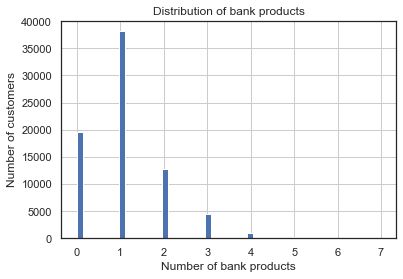

In [10]:
df_train.num_var4.hist(bins=50)
plt.xlabel('Number of bank products')
plt.ylabel('Number of customers')
plt.title('Distribution of bank products')
plt.show()

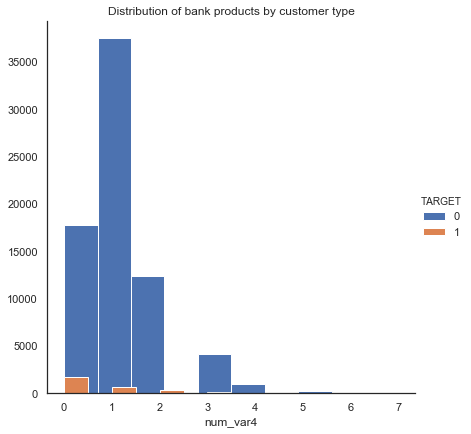

In [8]:
# TODO: Make this plot nice
sns.FacetGrid(df_train, hue="TARGET", size=6).map(plt.hist, "num_var4").add_legend()
plt.title('Distribution of bank products by customer type')
plt.show()

We note that unhappiness has a negative correlation with the number of bank products. That is, the majority of the unhappy cosutomers have less bank products. We make this clearer with the following plot:

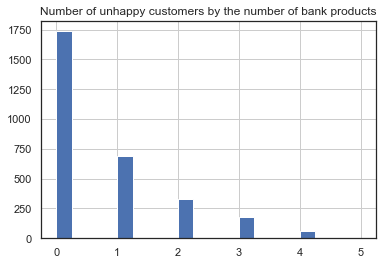

In [5]:
df_train[df_train.TARGET==1].num_var4.hist(bins=20)
plt.title('Number of unhappy customers by the number of bank products');

However, the majority of customers in general have less than two bank products. So this (num_var4) is not a good way to differentiate between the two classes.

TODO: Can we drop this feature? Or can we use the spike in 1 bank product satisfaction?

#### var15 - age of customer
According to https://www.kaggle.com/c/santander-customer-satisfaction/discussion/19291#110414, var15 denotes the age of the customer. This argument is based on the following histogram plot:

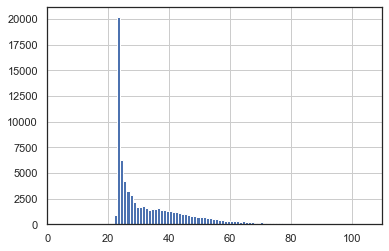

In [13]:
df_train.var15.hist(bins=100)

Note that var15 lies in in the interval [5, 105], with mean 33:

In [6]:
ser_var15 = df_train.var15
#print('Note that var15 lies in in the interval [{}, {}], with mean {:.1f}'
#      .format(min(ser_var15), max(ser_var15), ser_var15.mean()))
print('Min(var15) = {}'.format(min(ser_var15)))
print('Max(var15) = {}'.format(max(ser_var15)))
print('Mean(var15) = {:.1f}'.format(ser_var15.mean()))

Min(var15) = 5
Max(var15) = 105
Mean(var15) = 33.2


Let's see how var15 distributes when we split happy and unhappy customers:

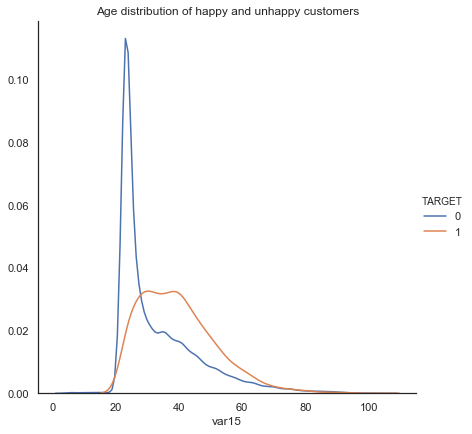

In [15]:
sns.FacetGrid(df_train, hue="TARGET", size=6).map(sns.kdeplot, "var15").add_legend()
plt.title('Age distribution of happy and unhappy customers');

In [16]:
ser_var15_happy = df_train.loc[df_train.TARGET == 0].var15
ser_var15_unhappy = df_train.loc[df_train.TARGET == 1].var15
print('Mean age of happy customers: {:.1f} years'.format(ser_var15_happy.mean()))
print('Mean age of unhappy customers: {:.1f} years'.format(ser_var15_unhappy.mean()))

Mean age of happy customers: 32.9 years
Mean age of unhappy customers: 39.7 years


That is, the unhappy customers tends to be older that the happy customers.

#### saldo_var30 - TODO: ??? Delete this section ???

(0, 3458077.32)

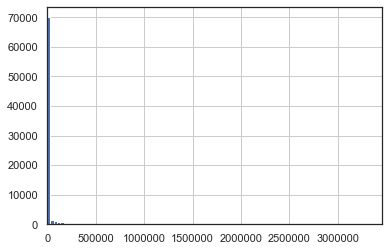

In [17]:
df_train.saldo_var30.hist(bins=100)
plt.xlim(0, df_train.saldo_var30.max())

In [18]:
df_train.saldo_var30.describe()

count    7.602000e+04
mean     1.367967e+04
std      6.301408e+04
min     -4.942260e+03
25%      0.000000e+00
50%      3.000000e+00
75%      2.359950e+02
max      3.458077e+06
Name: saldo_var30, dtype: float64

We observe that the data is skewed to the left.

C:\Users\e218560\Anaconda3\lib\site-packages\pandas\core\base.py:1154: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)
C:\Users\e218560\Anaconda3\lib\site-packages\pandas\core\base.py:1154: RuntimeWarning: invalid value encountered in log
  new_values = map_f(values, mapper)
C:\Users\e218560\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\e218560\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


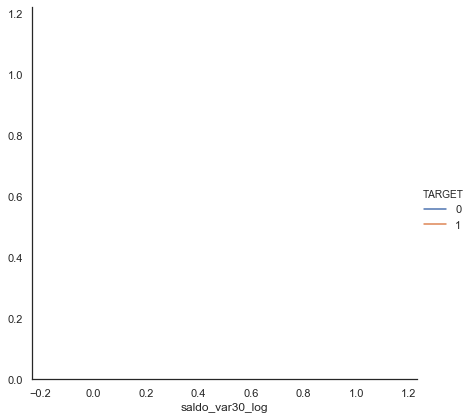

In [12]:
df_train['saldo_var30_log'] = df_train.saldo_var30.map(np.log)
sns.FacetGrid(df_train, hue="TARGET", size=6).map(sns.kdeplot, "saldo_var30_log").add_legend()

In [20]:
# Delete unnecessary feature
df_train.drop(columns=['saldo_var30_log'], inplace=True)

#### var38 - mortage value/value of the customer???

- TODO: Use this feature in ML section later??? "var38 is important according to XGBOOST see https://www.kaggle.com/cast42/santander-customer-satisfaction/xgboost-with-early-stopping/files"

In https://www.kaggle.com/c/santander-customer-satisfaction/discussion/19895, var38 is suggested to represent mortgage value. Moreover, according to dmi3kno, in https://www.kaggle.com/cast42/exploring-features/comments#115223, var38 either denotes networth or customer value (not necessarily with the bank). He also notes that: asset rich customers with low product count, are likely to be unhappy customers. We will check this statement in this subsection.

Note that we have an outlier in the data:

In [21]:
df_train.var38.value_counts().head(10)

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
236690.340000        8
329603.970000        7
104644.410000        7
67088.310000         7
125722.440000        7
Name: var38, dtype: int64

The value 117310.979016 has far more entries that the other values. However, the most common value lies close to the mean of the other values:

In [22]:
print('Mean of var38, excluding 117310.979016: {}'.format(df_train.var38[df_train['var38'] != 117310.979016].mean()))

Mean of var38, excluding 117310.979016: 117235.80943035621


Now, by excluding the outlier we have the following distribution:

In [14]:
ser_var38 = df_train.loc[~np.isclose(df_train.var38, 117310.979016), 'var38']
ser_var38.describe()

count    6.115100e+04
mean     1.172175e+05
std      2.036654e+05
min      5.163750e+03
25%      6.166988e+04
50%      8.890086e+04
75%      1.324928e+05
max      2.203474e+07
Name: var38, dtype: float64

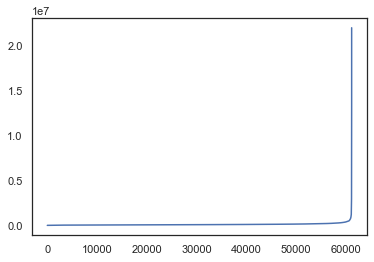

In [21]:
ser_var38.sort_values().reset_index().var38.plot()

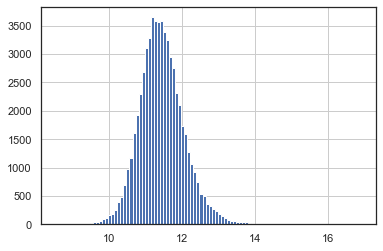

In [25]:
df_train.loc[~np.isclose(df_train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100)

##### Importance of var38

In [26]:
X = df_train.iloc[:,:-1]
y = df_train.TARGET

In [27]:
# TODO: add to imports
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

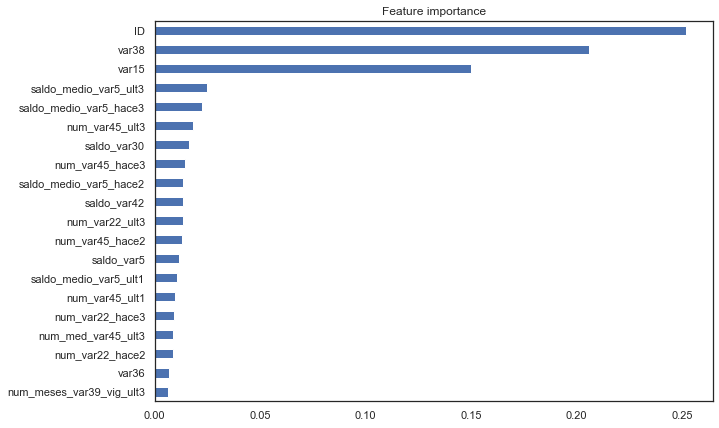

In [28]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.sort_values(inplace=True)
ax = feat_imp.tail(20).plot(kind='barh', figsize=(10,7), title='Feature importance')

#### Explore the interaction between var15 (age) and var38 (mortage value/value of the customer???)

C:\Users\e218560\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


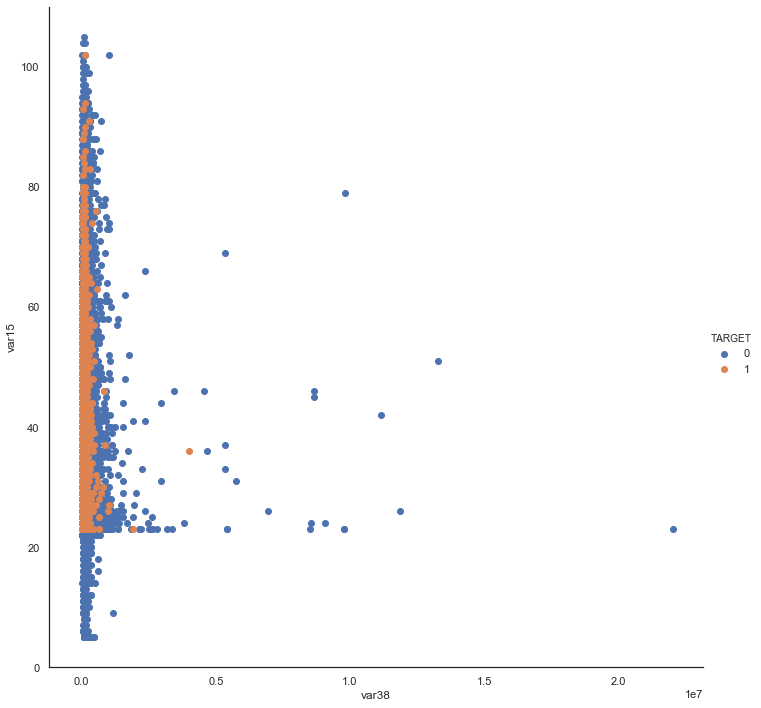

In [29]:
sns.FacetGrid(df_train, hue="TARGET", size=10).map(plt.scatter, "var38", "var15").add_legend()

In [31]:
# TODO: Continue this section
#df_train.logvar38

In [ ]:
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(plt.scatter, "logvar38", "var15") \
   .add_legend()
plt.ylim([0,120])

In [ ]:
print('Hello!')

In [ ]:
X = df_train.drop(columns=['TARGET']) # TODO: same as -> X = df_train.iloc[:, :-1]

In [ ]:
y = df_train.TARGET

In [ ]:
df_train

#### Linear dependence of features TODO
TODO: Check https://www.kaggle.com/cast42/exploring-features/comments#115223

var4 is product count. And the products are
- Cash products: var05, var08, var06/29, var20, var24, var14 and var13. These sum up to var30
- Credit products: var17, var44, var33. These sum up to var31
- ??? products: var25, var32. These sum up to var26.
Card products: var40, var41, var18, var34. These sum up to var01
- ??? product: var37

I may have missed one or two, but wherever you see a value in var04, be prepared for non-zero balance in a corresponding number of those fields.
PS. My personal opinion, of course.